In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

###### Train dataset

In [3]:
DF=pd.read_excel("Data_Train.xlsx")

In [5]:
DF.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
DF.shape

(10683, 11)

###### Test dataset

In [7]:
DF_test=pd.read_excel("Test_set.xlsx")

In [8]:
DF_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


#### checking for null values

In [9]:
DF.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

1 null value each is present in Total_Stops and Route

In [10]:
DF_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null Values are there

##### As train dataset have only 2 null values in total. Therefore dropping those rows.


In [11]:
DF.dropna(inplace=True)

In [12]:
DF.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

No more null values are present now.

In [13]:
DF.shape

(10682, 11)

In [14]:
DF.reset_index(inplace=True,drop=True)

### Dataframe Description:

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight
    
Target / Label Column:
    
Price: The price of the ticket

 



#### Lets get the basic summary and statistical information of the data.

In [15]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


All feature columns are object type but Date_of_Journey has date type data and Duration,Dep_Time and Arrival_Time have time data

In [16]:
DF.nunique() #the number of unique values in each column

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

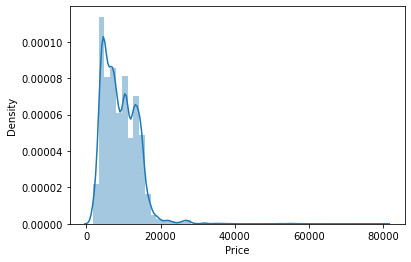

In [17]:
sns.distplot(DF.Price)

Distribution is skewed and tails of from 20000 mark.

In [18]:
DF.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [19]:
DF.Price.skew()

1.812404554693161

From the above, it is observed that the Price data forms a continuous distribution with mean of 9087.214 and tails off from 20000 mark.

#### Analyzing the Feature Columns

In [21]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [22]:
DF['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

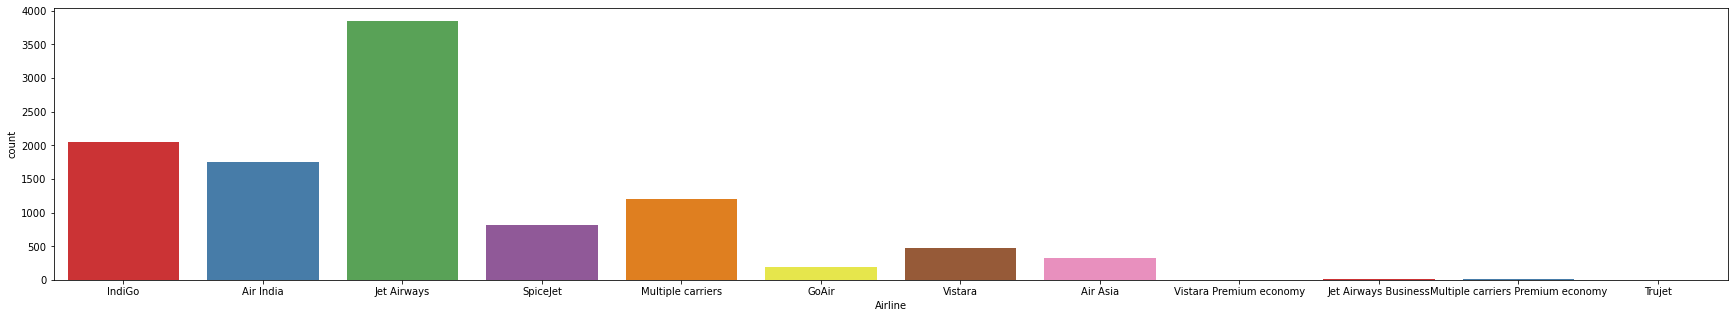

In [23]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Airline'], palette="Set1")

Jet Airways has the highest number of flights followed by IndiGo and Air India

In [24]:
DF['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [25]:
DF['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [26]:
DF['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

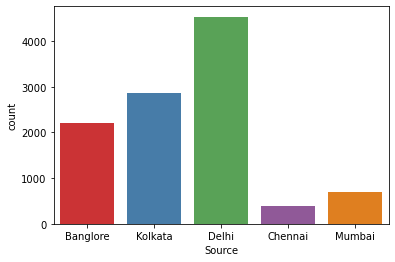

In [27]:
sns.countplot(DF['Source'], palette="Set1")

Highest number of flights are from Delhi followed by Kolkata and Bangalore

<AxesSubplot:xlabel='Destination', ylabel='count'>

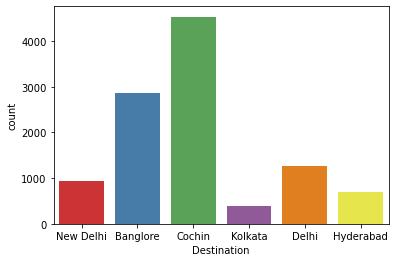

In [28]:
sns.countplot(DF['Destination'], palette="Set1")

Cochin is the most popular destination followed by Bangalore

In [29]:
DF['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

'Total_Stops' has 5 unique categories

In [30]:
DF['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

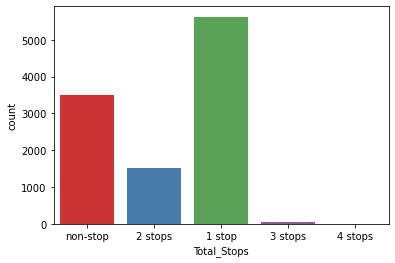

In [31]:
sns.countplot(DF['Total_Stops'], palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop

In [32]:
DF['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

We can see that Route values encompass respective Source, Destination and stopages in between.

In [33]:
DF['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [34]:
DF['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
22:25      1
04:50      1
12:45      1
21:40      1
21:35      1
Name: Dep_Time, Length: 222, dtype: int64

In [35]:
DF['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [36]:
DF['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:50 04 May      1
00:25 16 May      1
01:00 16 May      1
00:20 16 May      1
08:50 07 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [37]:
DF['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

In [38]:
DF.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
DF.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

##### % of data that is 'No info'/ 'No Info'

In [40]:
((DF['Additional_Info'] == 'No info').sum() +  (DF['Additional_Info'] == 'No Info').sum())/DF.Additional_Info.count()*100

78.14079760344505

78% of the data is unusable since there is no information available regarding it. Therefore 'Additional_Info' column must be dropped.

### Interpreting Relationship between Independent  and Dependent Variables

Grouping the data date-wise to better understand the relationship between 'Date_of_Journey' and 'Price'

Text(0.5, 1.0, 'Price Trend')

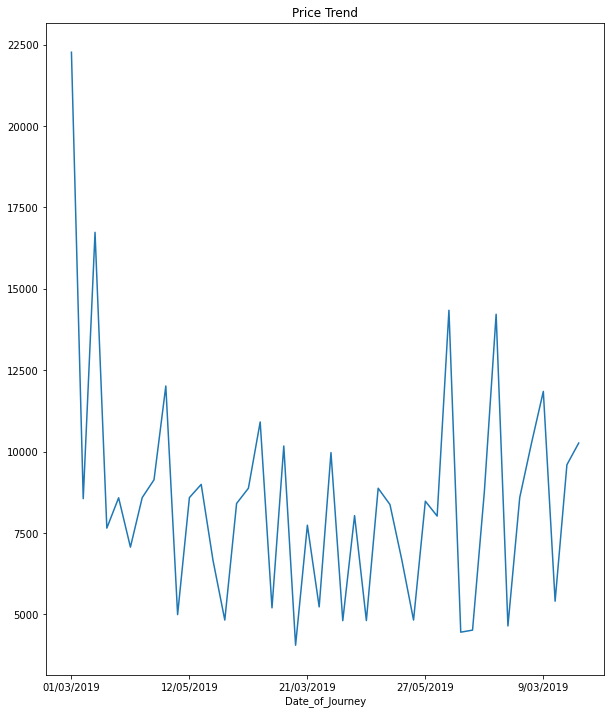

In [41]:
plt.figure(figsize=(10,12))
DF.groupby('Date_of_Journey').median()['Price'].plot()
plt.title('Price Trend')

From above graph it can be observed that there is a steady decline in Flight price from March to May.

#### Creating 'Day' and 'Month' columns from 'Date' Columnn

In [42]:
DF['Date_of_Journey']=pd.to_datetime(DF['Date_of_Journey']) #creating datetime type dataframe

In [43]:
DF['Day']=DF['Date_of_Journey'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

In [44]:
DF['Month']=DF['Date_of_Journey'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

In [45]:
DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


#### Dropping 'Date_of_Journey	' column since  it doesn't contribute to building a good model for predicting the target variable values.

In [46]:
DF.drop(columns = ['Date_of_Journey'],inplace = True)

#### Dropping 'Additional_Info	' column since  it doesn't contribute to building a good model for predicting the target variable values.

In [47]:
DF.drop(columns = ['Additional_Info'],inplace = True)

In [48]:
DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,4,9
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,3,1


#### Analyzing Relationship between Day, Month columns and Price

In [49]:
DF.Month

0         3
1         1
2         9
3        12
4         1
         ..
10677     9
10678     4
10679     4
10680     1
10681     9
Name: Month, Length: 10682, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='Price'>

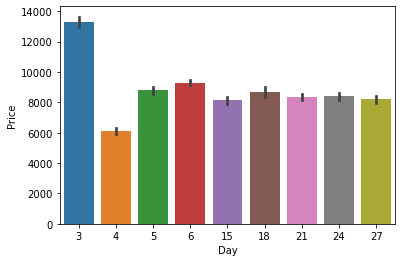

In [50]:
sns.barplot(x='Day',y='Price',data=DF)

From above graph it can be observed that Flight Prices are the highest on 3rd day of a month and lowest on the 4th day.

<AxesSubplot:xlabel='Month', ylabel='Price'>

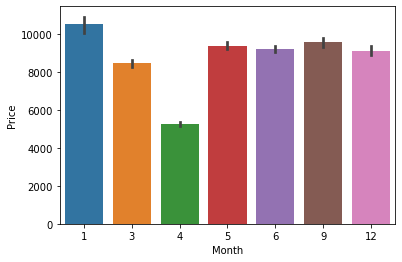

In [51]:
sns.barplot(x='Month',y='Price',data=DF)

From above graph it can be observed that Flight Prices are the highest in January and lowest in April.

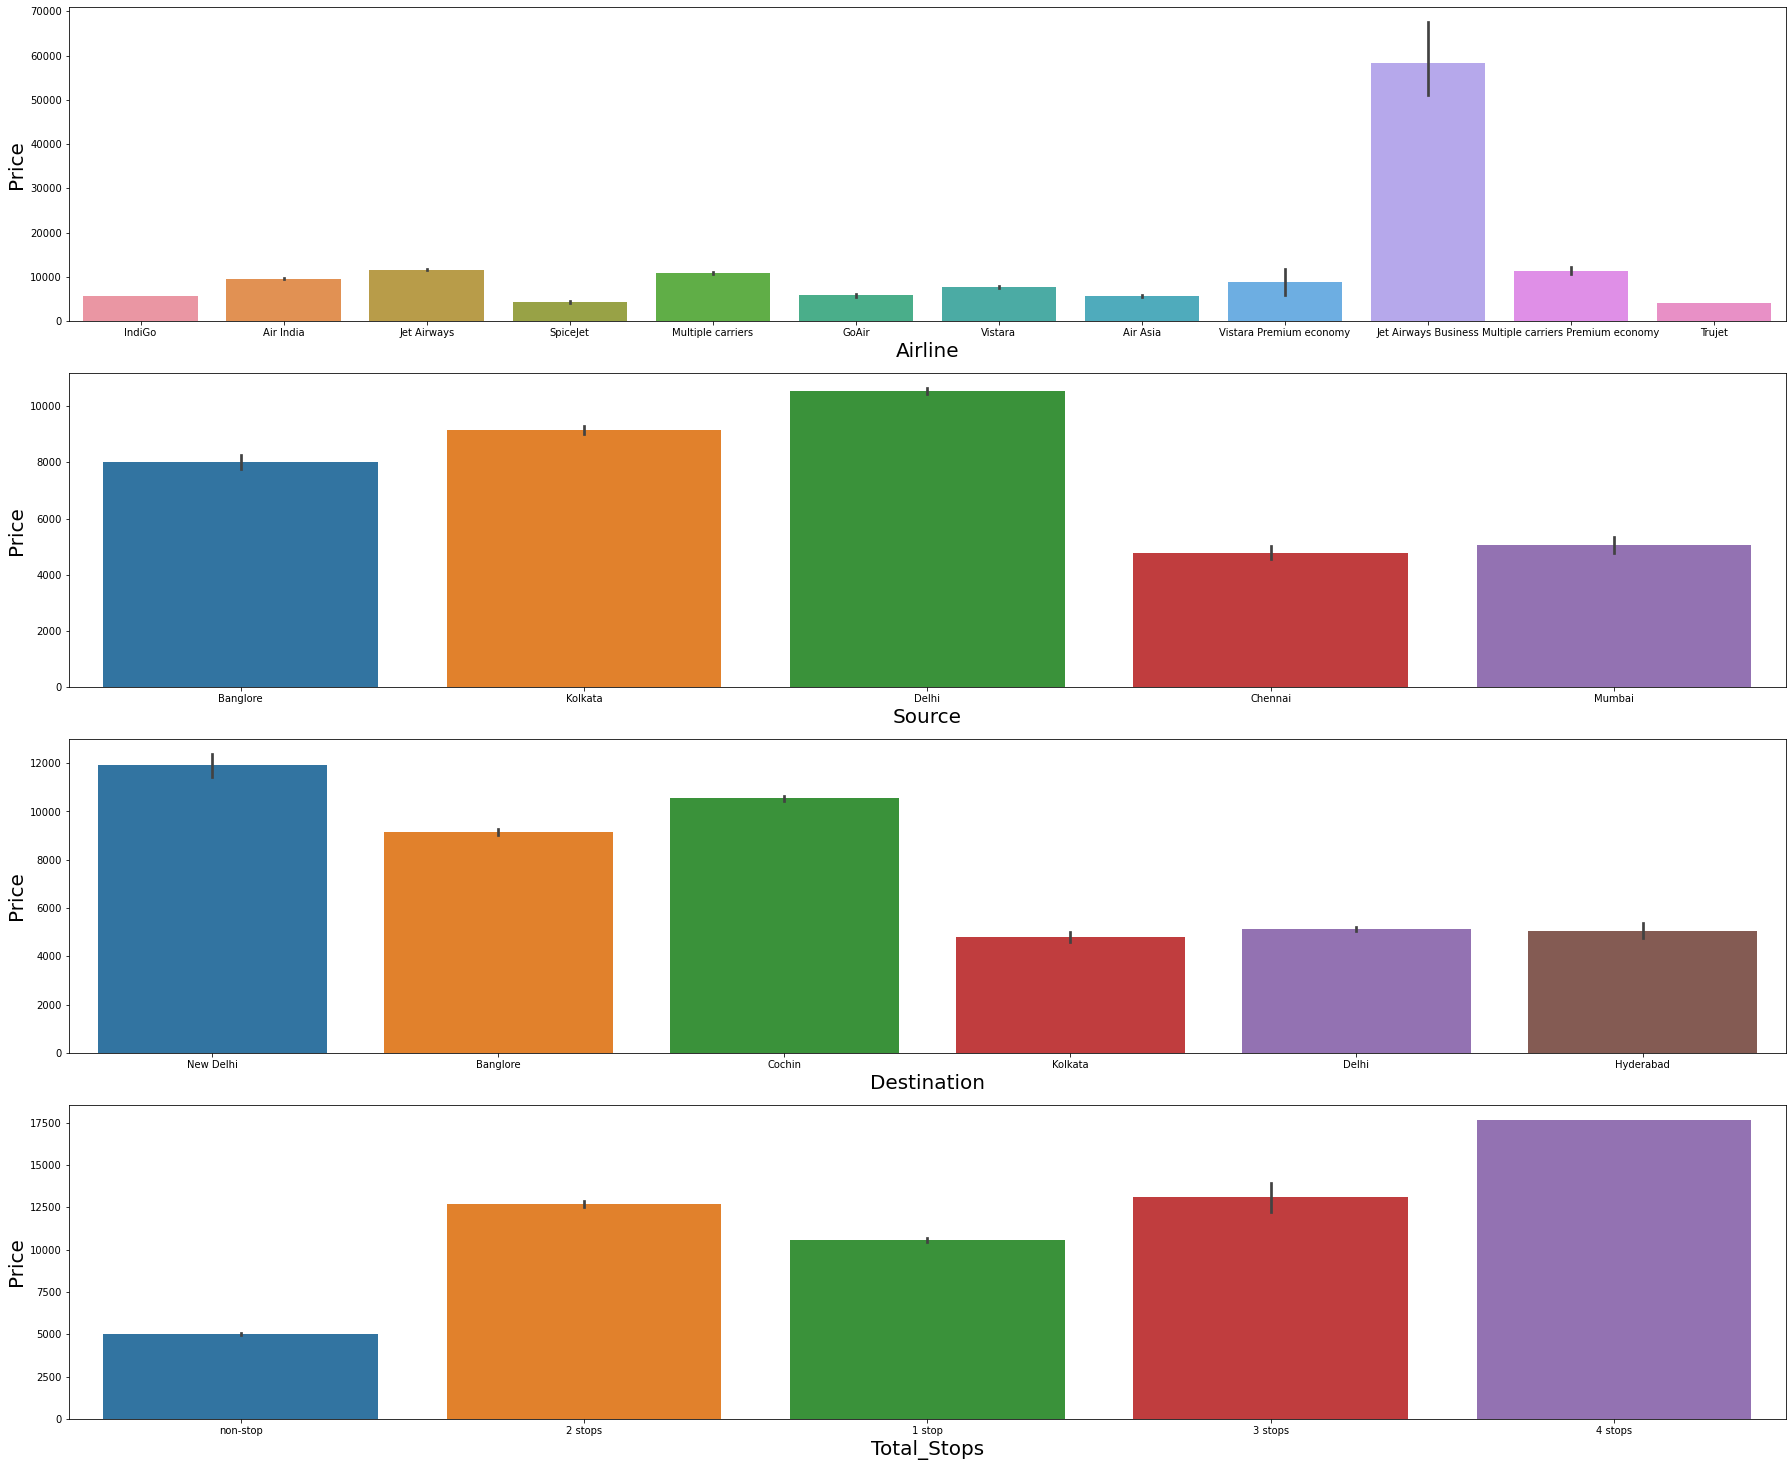

In [52]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
y = DF['Price']
X =  DF.drop(columns=['Price','Month','Day','Route','Dep_Time','Arrival_Time','Duration'])
for col in X:
    if plotnum<=5:
        plt.subplot(5,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made:

Jet Airways Business is the most expensiven airlines.

Flight prices are the highest when source is Delhi, followed by Kolkata.

Flight prices are the highest when Destination is Cochin, followed by New Delhi and Bangalore.

The higher the number of stops the higher is the fare.

#### Duration column vs Price

In [53]:
DF['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10677    2h 30m
10678    2h 35m
10679        3h
10680    2h 40m
10681    8h 20m
Name: Duration, Length: 10682, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

In [54]:
duration = DF['Duration'].tolist() #creating a list with values from colum 'Duration'

In [55]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [56]:
for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace(" ","+").replace("m","") #replacing 'h' with *60, whitespace with "+" and removing "m"

In [57]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])  

In [58]:
duration

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [59]:
len(duration)

10682

##### Adding Duration(mins) column to fDF dataframe.

In [60]:
df_dur = pd.DataFrame({"Duration(mins)":duration})

In [61]:
df_dur.index = DF.index

In [62]:
DF['Duration(mins)'] = df_dur['Duration(mins)']

In [63]:
DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,3,1,160


Dropping the original duration column

In [64]:
DF.drop(columns = ['Duration'],inplace=True)

In [65]:
DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,12648,3,1,160


Text(0.5, 1.0, 'Price Trend')

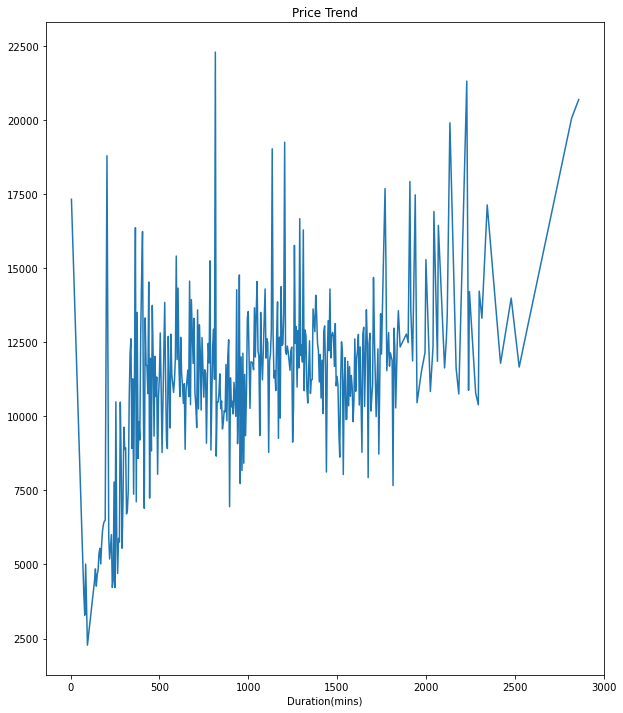

In [67]:
plt.figure(figsize=(10,12))
DF.groupby('Duration(mins)').mean()['Price'].plot()
plt.title('Price Trend')

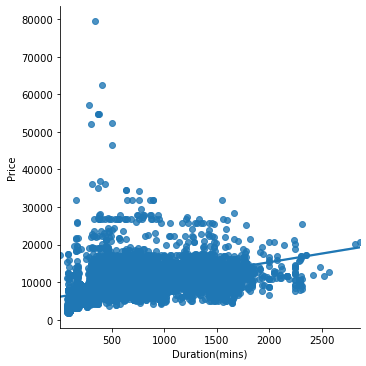

In [68]:
sns.lmplot(x="Duration(mins)", y="Price", data=DF)

There is a linear relationship between Price and flight duration.

In [71]:
DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,12648,3,1,160


Dropping column : 'Route' since 'Total_Stops' in combination with 'Source' and 'Destination' columns conveys the same information.

Dropping columns : Dep_Time, Arrival_Time since 'Duration(mins)' conveys the difference between Dep_Time and Arrival_Time.

In [72]:
DF.drop(columns = ['Route','Dep_Time','Arrival_Time'],inplace=True)

In [73]:
DF

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,non-stop,12648,3,1,160


### Checking for Outliers in continuous data type Features.

<AxesSubplot:xlabel='Duration(mins)'>

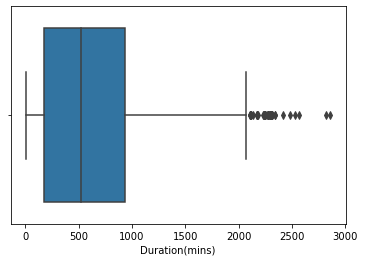

In [74]:
sns.boxplot(DF['Duration(mins)'])

There are outliers in all of the above column

#### Removing Outliers using IQR Method

In [75]:
df =DF[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [76]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array

In [77]:
df = df.drop(indxdrop)

In [78]:
df.shape

(10609, 1)

##### Data loss %:

In [79]:
loss=(10682-10609)/10682 * 100
loss

0.6833926231042875

In [80]:
dropindx = DF.index.difference(df.index)

In [81]:
dropindx

Int64Index([  226,   553,   919,   925,   966,   969,   991,  1067,  1113,
             1318,  1346,  1442,  1496,  1551,  1657,  1791,  1804,  2172,
             2553,  2641,  2654,  2718,  3457,  3496,  3790,  3815,  3966,
             4047,  4118,  4463,  4655,  4785,  5516,  5701,  5711,  5782,
             5933,  5953,  6059,  6085,  6321,  6476,  6884,  7001,  7189,
             7232,  7306,  7329,  7553,  7611,  7612,  7876,  7906,  8127,
             8153,  8360,  8409,  8412,  8601,  8621,  8698,  8729,  9246,
             9395,  9483,  9550,  9672,  9702,  9847, 10019, 10325, 10455,
            10638],
           dtype='int64')

In [82]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [83]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [84]:
DF

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...
10604,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,150
10605,Air India,Kolkata,Banglore,non-stop,4145,27,4,155
10606,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,180
10607,Vistara,Banglore,New Delhi,non-stop,12648,3,1,160


<AxesSubplot:xlabel='Duration(mins)'>

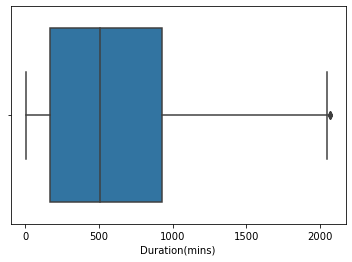

In [85]:
sns.boxplot(DF['Duration(mins)'])

A lot of outliers have been removed.

### Checking for skewness in data distributions

In [86]:
DF['Duration(mins)'].skew()

0.7691478996225911

In [87]:
df2=np.log(DF['Duration(mins)'])

In [88]:
df2.skew()

-0.1826834230787671

In [89]:
df2

0        5.135798
1        6.098074
2        7.038784
3        5.783825
4        5.652489
           ...   
10604    5.010635
10605    5.043425
10606    5.192957
10607    5.075174
10608    6.214608
Name: Duration(mins), Length: 10609, dtype: float64

In [91]:
df2.index = DF.index

In [94]:
DF['Duration(mins)'] = df2

In [95]:
DF['Duration(mins)'].skew()

-0.1826834230787671

A lot of skewness has been removed.

### Encoding Categorical Columns

####  Encoding using get_dummies()

In [96]:
DF

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,5.135798
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,6.098074
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,7.038784
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,5.783825
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,5.652489
...,...,...,...,...,...,...,...,...
10604,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,5.010635
10605,Air India,Kolkata,Banglore,non-stop,4145,27,4,5.043425
10606,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,5.192957
10607,Vistara,Banglore,New Delhi,non-stop,12648,3,1,5.075174


In [98]:
dumm = pd.get_dummies(DF[['Airline','Source','Destination','Total_Stops']],drop_first = False)

In [99]:
dumm

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10605,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10606,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
10607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [100]:
DF = DF.join(dumm)

In [101]:
DF.drop(columns = ['Airline','Source','Destination','Total_Stops'],inplace=True)

In [102]:
DF

,Price,Day,Month,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,5.135798,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7662,5,1,6.098074,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,13882,6,9,7.038784,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,6218,5,12,5.783825,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13302,3,1,5.652489,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,4107,4,9,5.010635,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10605,4145,27,4,5.043425,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10606,7229,27,4,5.192957,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
10607,12648,3,1,5.075174,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Finding Correlation 

In [103]:
f_corr =DF.corr()

In [104]:
f_corr

,Price,Day,Month,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
Price,1.000000,-0.163586,0.012495,0.605722,-0.132694,0.046096,-0.094839,-0.360302,0.417976,0.254413,...,0.270029,-0.312927,-0.231333,-0.178971,0.189440,0.352695,0.316477,0.058105,0.018162,-0.613690
Day,-0.163586,1.000000,-0.264392,-0.042228,0.009020,-0.035067,0.002244,0.012872,-0.029925,-0.026208,...,0.112963,0.011229,-0.012858,0.012091,-0.097352,-0.047234,0.017215,-0.023403,-0.010697,0.040361
Month,0.012495,-0.264392,1.000000,0.073225,0.000432,-0.000712,-0.017749,-0.037906,0.059638,-0.026836,...,0.008510,0.008494,-0.016954,-0.015260,-0.099454,0.028567,0.043974,0.010508,-0.014744,-0.063475
Duration(mins),0.605722,-0.042228,0.073225,1.000000,-0.096361,0.180532,-0.074758,-0.356861,0.322995,-0.004163,...,0.415498,-0.385240,-0.405063,-0.246311,0.018262,0.523115,0.405797,0.051318,0.014960,-0.859429
Airline_Air Asia,-0.132694,0.009020,0.000432,-0.096361,1.000000,-0.076886,-0.024030,-0.086248,-0.132290,-0.004188,...,-0.061072,0.056142,-0.046618,-0.033982,-0.019101,-0.044388,-0.056013,-0.009218,-0.001710,0.089310
Airline_Air India,0.046096,-0.035067,-0.000712,0.180532,-0.076886,1.000000,-0.059598,-0.213903,-0.328093,-0.010388,...,-0.004235,-0.065499,0.023578,-0.049748,0.050325,-0.185818,0.362054,0.080513,0.022234,-0.077714
Airline_GoAir,-0.094839,0.002244,-0.017749,-0.074758,-0.024030,-0.059598,1.000000,-0.066854,-0.102544,-0.003247,...,-0.008385,0.099573,-0.036136,-0.026341,0.017777,-0.001213,-0.054586,-0.007145,-0.001325,0.042166
Airline_IndiGo,-0.360302,0.012872,-0.037906,-0.356861,-0.086248,-0.213903,-0.066854,1.000000,-0.368043,-0.011653,...,-0.078050,0.089238,0.059313,0.141399,-0.018298,-0.141281,-0.182766,-0.025646,-0.004756,0.287129
Airline_Jet Airways,0.417976,-0.029925,0.059638,0.322995,-0.132290,-0.328093,-0.102544,-0.368043,1.000000,-0.017873,...,-0.020179,-0.052356,-0.025205,-0.145013,0.059166,0.198741,0.080897,-0.039336,-0.007295,-0.265940
Airline_Jet Airways Business,0.254413,-0.026208,-0.026836,-0.004163,-0.004188,-0.010388,-0.003247,-0.011653,-0.017873,1.000000,...,-0.004275,-0.008753,-0.006298,-0.004591,0.048926,0.006504,0.013483,-0.001245,-0.000231,-0.016659


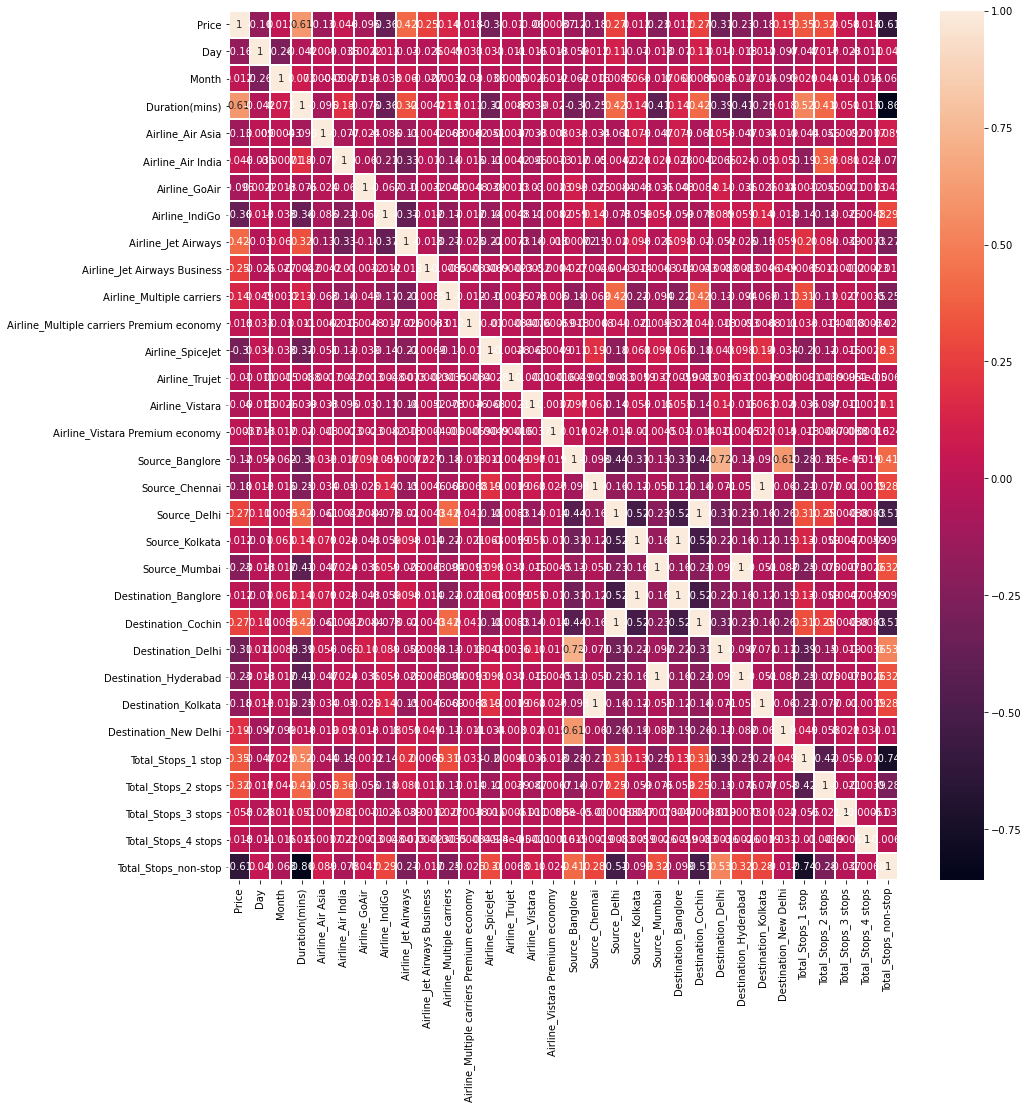

In [105]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

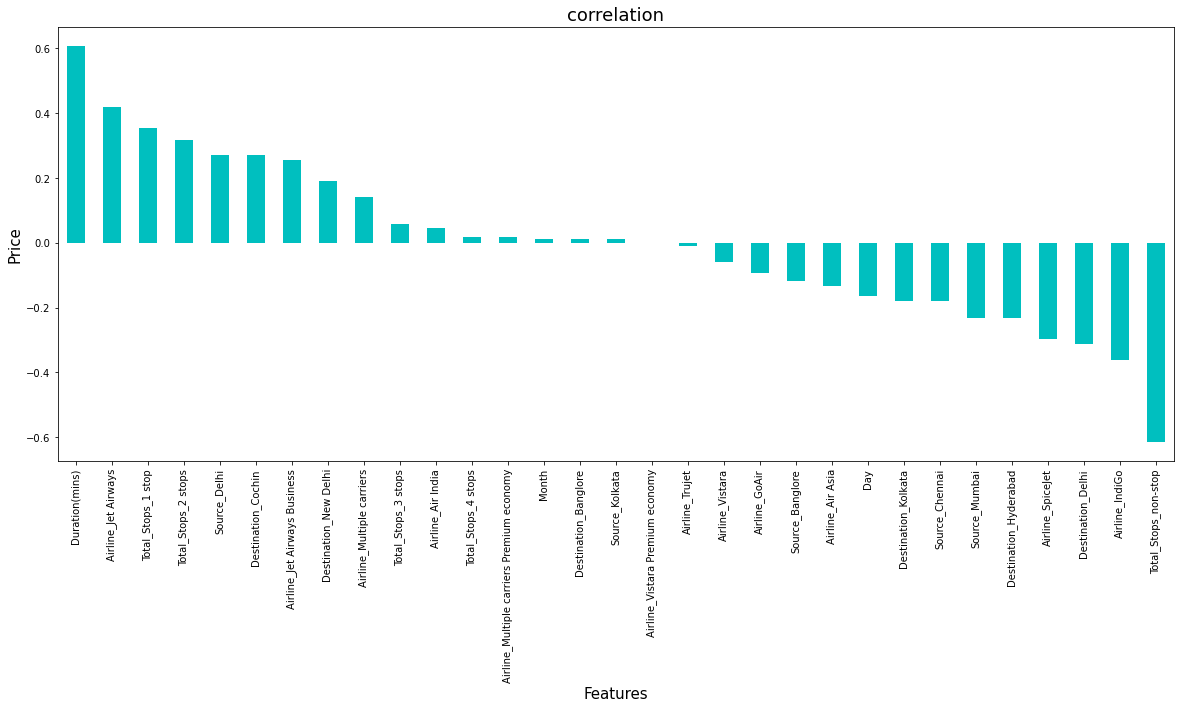

In [107]:
plt.figure(figsize = (20,8))
DF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Duration(mins), Airline Jet_Airways,Total_Stops_1 stop have the highest positive correlation with Price, while Total_Stops_non-stop,Airline_IndiGo,Destination_Delhi and Airline_SpiceJet have the highest negative correlation with Price

### Feature Selection

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
X = DF.drop(columns = ['Price'])
y = DF['Price']

In [110]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif = pd.DataFrame()

In [113]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [114]:
vif

,Features,vif
0,Day,1.115408e+00
1,Month,1.104676e+00
2,Duration(mins),5.633010e+00
3,Airline_Air Asia,1.599716e+06
4,Airline_Air India,1.117714e+04
5,Airline_GoAir,3.006374e+07
6,Airline_IndiGo,5.872072e+02
7,Airline_Jet Airways,1.076282e+04
8,Airline_Jet Airways Business,3.880794e+07
9,Airline_Multiple carriers,1.307832e+05


There is no multicollinearity.

### Principle Component Analysis

In [115]:
from sklearn.decomposition import PCA

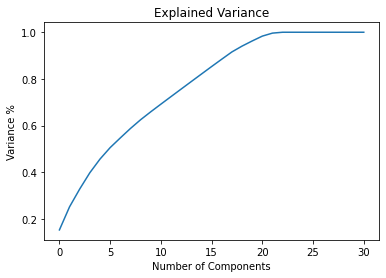

In [116]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

21 components explain around 95% variance in Data

### Selecting Kbest Features

In [117]:
from sklearn.feature_selection import SelectKBest, f_classif

In [118]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [119]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(32,'Score'))

                                      Feature       Score
10  Airline_Multiple carriers Premium economy         inf
29                        Total_Stops_4 stops         inf
14            Airline_Vistara Premium economy         inf
8                Airline_Jet Airways Business         inf
12                             Airline_Trujet         inf
30                       Total_Stops_non-stop  417.368221
7                         Airline_Jet Airways  380.872459
13                            Airline_Vistara  347.587942
21                         Destination_Cochin  249.119306
17                               Source_Delhi  249.119306
15                            Source_Banglore  234.820993
9                   Airline_Multiple carriers  227.073672
19                              Source_Mumbai  224.776662
23                      Destination_Hyderabad  224.776662
18                             Source_Kolkata  222.903593
20                       Destination_Banglore  222.903593
16            

#### Selecting best features based on their scores:

In [120]:
x_best = X.drop(columns=['Airline_Multiple carriers Premium economy','Total_Stops_4 stops','Airline_Vistara Premium economy','Airline_Jet Airways Business','Airline_Trujet']).copy()

In [121]:
scaled_x_best = scaler.fit_transform(x_best)

### As the  Target column ('Price') has Continuous type of Data, this shows that this is a regression problem


## Regression Model Building

In [122]:
from sklearn.model_selection import train_test_split

In [124]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

#### Finding the Best Random State

In [149]:
from xgboost import XGBRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =Lasso()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8373164144158549 on random_state: 23


In [163]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =11)

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [165]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [166]:
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
L=Lasso()
SVR= SVR()
R=Ridge()
XGB=XGBRegressor()

### Training the Models

In [167]:
models=[RFR,DTR,L,SVR,R,XGB]

In [168]:
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    R2=r2_score(y_test,pred)
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    CVS=cross_val_score(m,scaled_x_best,y,cv=5).mean()
    print(m,"Results:")
    print("R2 Score:",R2)
    print("Cross Validation Score:",CVS)
    print("MSE:",MSE)
    print("RMSE:",RMSE)
    print("\n")

RandomForestRegressor() Results:
R2 Score: 0.7464268782111001
Cross Validation Score: 0.7307971852873202
MSE: 5533862.87152543
RMSE: 2352.41638991175


DecisionTreeRegressor() Results:
R2 Score: 0.6235645809855868
Cross Validation Score: 0.5905373791825259
MSE: 8215152.986700217
RMSE: 2866.208817706801


Lasso() Results:
R2 Score: 0.6168806973671317
Cross Validation Score: 0.5782942573793846
MSE: 8361018.980433411
RMSE: 2891.542664467085


SVR() Results:
R2 Score: 0.08015822302924747
Cross Validation Score: 0.07977242865888845
MSE: 20074202.74414608
RMSE: 4480.424393307634


Ridge() Results:
R2 Score: 0.6185767859566291
Cross Validation Score: 0.5783149688882363
MSE: 8324004.325228545
RMSE: 2885.135061869469


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
          

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model. It also has the lowest RMSE

### Hyper Parameter Tuning

In [169]:
from sklearn.model_selection import GridSearchCV

In [176]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[6,10,20,40,60],'subsample':[0.5,1]}

In [177]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [178]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [179]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'max_depth': 6,
 'min_child_weight': 4,
 'subsample': 1}

In [180]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.2, max_depth= 6, min_child_weight = 4, subsample = 1)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000003,
             max_delta_step=0, max_depth=6, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [181]:
XGBpred = Best_mod.predict(x_test)
acc = r2_score(y_test,XGBpred)
print(acc*100)

81.08565731673598


##### XGB Regressor has an accuracy of 81.08%

#### Saving The Model

In [182]:
import joblib
joblib.dump(Best_mod,"BestModelFlight.pkl")

['BestModelFlight.pkl']

### Preparing the Test Dataset

In [183]:
DF_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [184]:
DF_test.drop(columns=['Route','Additional_Info'],inplace=True)

In [185]:
DF_test['Date_of_Journey']=pd.to_datetime(DF_test['Date_of_Journey'])

In [186]:
DF_test['Day']=DF_test['Date_of_Journey'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

In [187]:
DF_test['Month']=DF_test['Date_of_Journey'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

In [188]:
DF_test.drop(columns = ['Date_of_Journey'],inplace = True)

In [189]:
duration = DF_test['Duration'].tolist() #creating a list with values from colum 'Duration'

In [190]:
for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace(" ","+").replace("m","") #replacing 'h' with *60, whitespace with "+" and removing "m"
    

In [191]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])
    

In [192]:
df_dur = pd.DataFrame({"Duration(mins)":duration})

In [193]:
df_dur.index = DF_test.index

In [194]:
DF_test['Duration(mins)'] = df_dur['Duration(mins)']

In [195]:
DF_test.drop(columns = ['Duration','Dep_Time','Arrival_Time'],inplace=True)

In [196]:
df2 =DF_test[['Duration(mins)']].copy()

In [197]:
indxdrop = np.array([])
for colm in df2:
    q1 = df2[colm].quantile(0.25)
    q3 = df2[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df2[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array

In [198]:
df2 = df2.drop(indxdrop)

In [199]:
dropindx = DF_test.index.difference(df2.index)

In [200]:
DF_test.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [201]:
DF_test.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [202]:
DF_test

,Airline,Source,Destination,Total_Stops,Day,Month,Duration(mins)
0,Jet Airways,Delhi,Cochin,1 stop,6,6,655
1,IndiGo,Kolkata,Banglore,1 stop,5,12,240
2,Jet Airways,Delhi,Cochin,1 stop,21,5,1425
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,780
4,Air Asia,Banglore,Delhi,non-stop,24,6,170
...,...,...,...,...,...,...,...
2644,Air India,Kolkata,Banglore,1 stop,6,6,1435
2645,IndiGo,Kolkata,Banglore,non-stop,27,3,155
2646,Jet Airways,Delhi,Cochin,1 stop,3,6,395
2647,Air India,Delhi,Cochin,1 stop,3,6,915


In [203]:
df5=np.log(DF_test['Duration(mins)'])

In [204]:
df5.index = DF_test.index

In [206]:
DF_test['Duration(mins)'] = df5

In [207]:
DF_test['Duration(mins)'].skew()

-0.2382580208347267

In [208]:
dumm = pd.get_dummies(DF_test[['Airline','Source','Destination','Total_Stops']],drop_first = False)

In [209]:
DF_test = DF_test.join(dumm)

In [210]:
DF_test.drop(columns = ['Airline','Source','Destination','Total_Stops'],inplace=True)

In [211]:
x_best = DF_test.drop(columns=['Airline_Multiple carriers Premium economy','Total_Stops_4 stops','Airline_Vistara Premium economy','Airline_Jet Airways Business']).copy()

In [212]:
scaled_x_best = scaler.fit_transform(x_best)

#### Loading The Model

In [213]:
mod=joblib.load("BestModelFlight.pkl")

In [214]:
print(mod.predict(scaled_x_best))

[12826.24   5079.328 12250.95  ... 16673.39  12776.097  8249.483]


In [216]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y[:2649]})
Prediction_accuracy.head(20)

,Predictions,Actual Values
0,12826.240234,3897
1,5079.328125,7662
2,12250.950195,13882
3,10365.069336,6218
4,3815.131348,13302
5,11146.614258,3873
6,10217.348633,11087
7,6357.293945,22270
8,4657.760742,11087
9,14257.104492,8625
